In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
train = pd.read_csv("Dados/train.csv", sep=",")
test = pd.read_csv("Dados/test.csv", sep=",")
gender = pd.read_csv("Dados/gender_submission.csv", sep=",")

In [51]:
###Verificando os dados

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
#Verificando dados e tipos de cada colunas

In [56]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
survived = train.groupby(['Survived']).size()
survived

Survived
0    549
1    342
dtype: int64

In [58]:
pclass = train.groupby(['Pclass']).size()
pclass

Pclass
1    216
2    184
3    491
dtype: int64

In [59]:
sex = train.groupby(['Sex']).size()
sex

Sex
female    314
male      577
dtype: int64

In [60]:
age = train.groupby(['Age']).size()
age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [153]:
sibSp = train.groupby(['SibSp']).size()
sibSp

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [154]:
parch = train.groupby(['Parch']).size()
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [63]:
embarked = train.groupby(['Embarked']).size()
embarked

Embarked
C    168
Q     77
S    644
dtype: int64

<Axes: xlabel='Survived'>

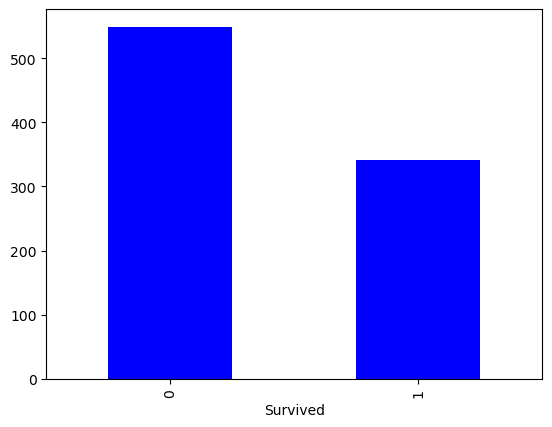

In [64]:
survived.plot.bar(color = 'blue')

In [65]:
#Fazendo graficos para comparar cada coluna com a coluna 'Survived'

<Axes: xlabel='Pclass'>

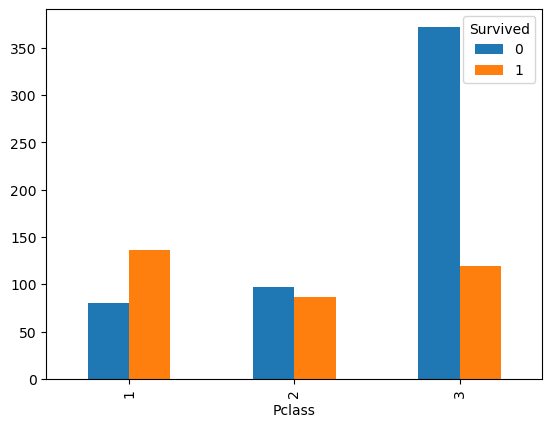

In [66]:
#Pclass
# poderia definir sem o for, usando apenas: ordem = [1, 2, 3] 
#mas em colunas com mais categorias pode ficar mais longo definir cada variavel
ordem = []
for key in pclass.keys(): ordem.append(key)
    
train.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Sex'>

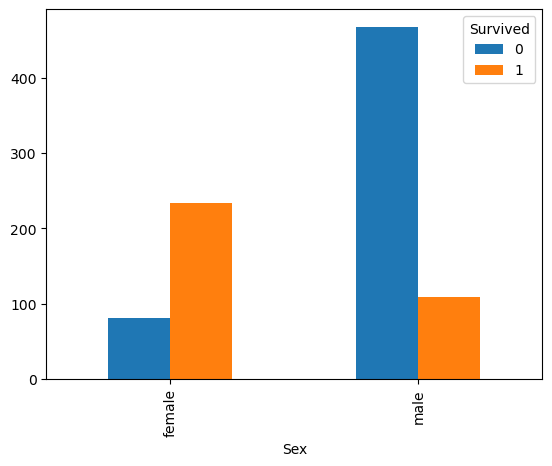

In [67]:
#Sex
ordem = []
for key in sex.keys(): ordem.append(key)

train.groupby('Survived')['Sex'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Count', ylabel='Age'>

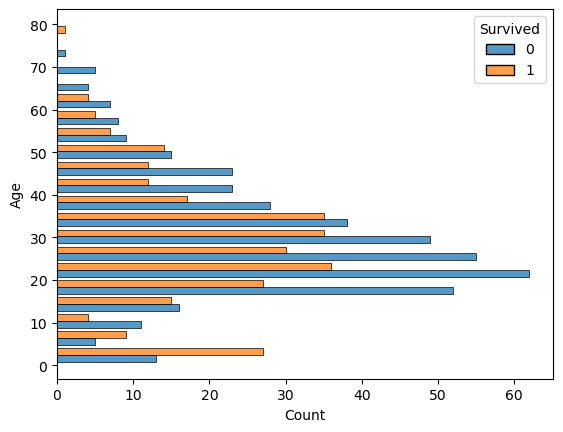

In [68]:
#Age
plot = sns.histplot(data=train, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='SibSp'>

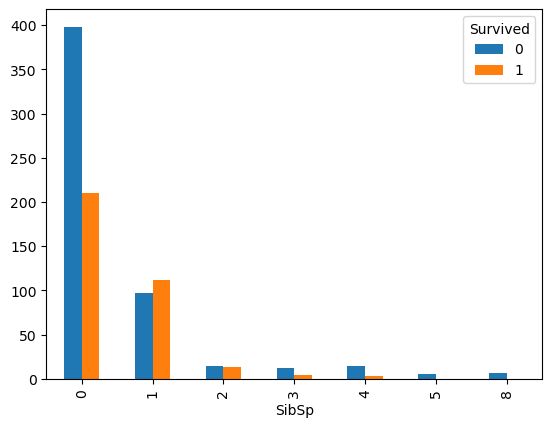

In [69]:
#SibSp
ordem = []
for key in sibSp.keys(): ordem.append(key)
    
train.groupby('Survived')['SibSp'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Parch'>

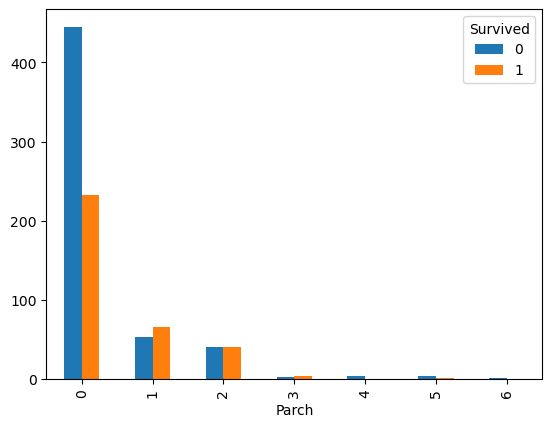

In [70]:
#Parch
ordem = []
for key in parch.keys(): ordem.append(key)
    
train.groupby('Survived')['Parch'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Count', ylabel='Fare'>

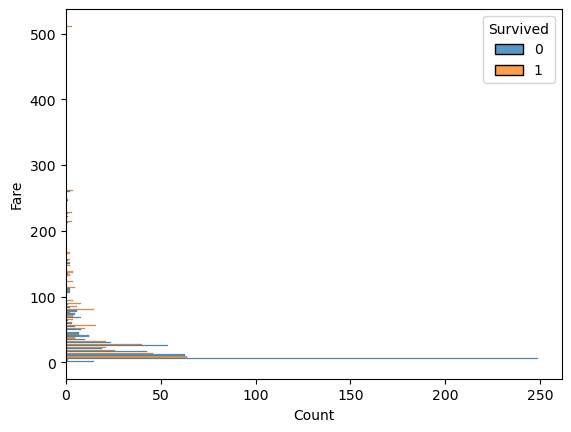

In [71]:
#Fare
plot = sns.histplot(data=train, y="Fare", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='Embarked'>

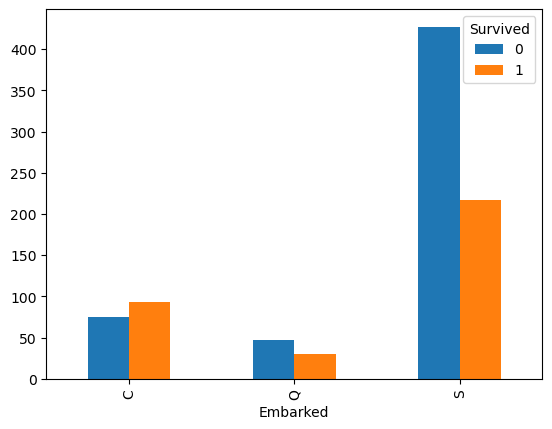

In [72]:
#Embarked
ordem = []
for key in embarked.keys(): ordem.append(key)
    
train.groupby('Survived')['Embarked'].value_counts().unstack(0).loc[ordem].plot.bar(use_index=True)

In [73]:
sobreviventes = train[train.Survived==1]
sobreviventes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [74]:
sex = sobreviventes.groupby(['Sex']).size()
sex

Sex
female    233
male      109
dtype: int64

In [75]:
#aqui eu descobri que todas a mulheres da classe 1 e 2 desses dados foram sobreviventes

In [76]:
teste = train[(train.Sex=='female')&((train.Pclass==1)|(train.Pclass==2))]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [77]:
teste = train[(train.Sex=='female')&(train.Pclass==1)]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [78]:
teste = train[(train.Sex=='female')&(train.Pclass==2)]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [79]:
#observei os sobreviventes homens considerados crianças

In [80]:
teste = train[(train.Sex=='male')& ((train.Pclass==1)|(train.Pclass==2))]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [81]:
survived = teste.groupby(['Survived']).size()
survived

Survived
0    168
1     62
dtype: int64

In [82]:
criancas = teste[teste.Age<15]
criancas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S


In [83]:
survived = criancas.groupby(['Survived']).size()
survived

Survived
1    12
dtype: int64

In [84]:
#tarifa <=500

In [150]:
#Aparentemente mulheres do embarker C e Q sozinhas tiveram mais chances de sobreviver
teste = train[(train.Sex=='female')&(train.Pclass==3)&((train.Embarked=='C')|(train.Embarked=='Q'))]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C


In [141]:
sibSp = teste.groupby(['SibSp']).size()
sibSp

SibSp
0    40
1    12
2     4
dtype: int64

<Axes: xlabel='SibSp'>

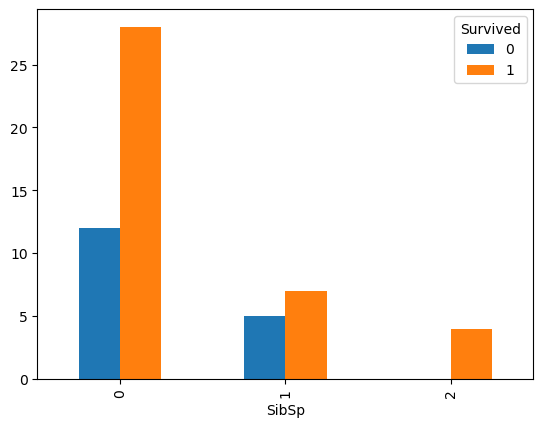

In [142]:
#SibSp
ordem = []
for key in sibSp.keys(): ordem.append(key)
    
teste.groupby('Survived')['SibSp'].value_counts().unstack(0).loc[ordem].plot.bar()

In [143]:
#Parch
parch = teste.groupby(['Parch']).size()
parch

Parch
0    40
1     9
2     5
3     1
5     1
dtype: int64

<Axes: xlabel='Parch'>

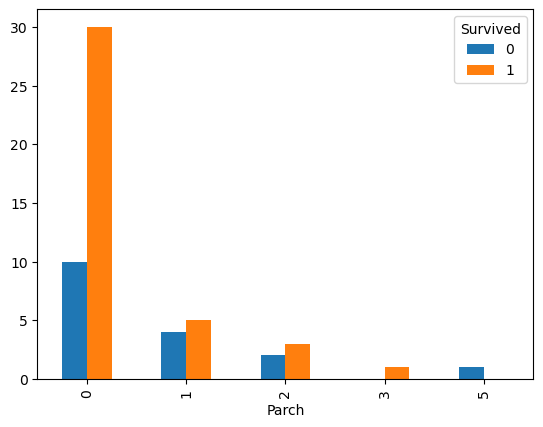

In [144]:
#Parch
ordem = []
for key in parch.keys(): ordem.append(key)
    
teste.groupby('Survived')['Parch'].value_counts().unstack(0).loc[ordem].plot.bar()

In [145]:
testeF = teste[(teste.SibSp==0)&(teste.Parch==0)]

In [146]:
survived = testeF.groupby(['Survived']).size()
survived

Survived
0     7
1    23
dtype: int64

In [147]:
testeF = teste[(teste.SibSp==0)|(teste.Parch==0)]

In [148]:
survived = testeF.groupby(['Survived']).size()
survived

Survived
0    15
1    35
dtype: int64

In [200]:
teste = train[(train.Sex=='female')&(train.Survived==1)]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [201]:
teste = train[(train.Sex=='female')&(train.Pclass==3)&((train.Embarked=='C')|(train.Embarked=='Q'))&(train.Age<=17)]
teste

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
114,115,0,3,"Attalah, Miss. Malake",female,17.00,0,0,2627,14.4583,NaN,C
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.00,0,0,35851,7.7333,NaN,Q
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.00,0,0,367231,7.7500,NaN,Q
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [202]:
survived = teste.groupby(['Survived']).size()
survived

Survived
0     3
1    12
dtype: int64

<Axes: xlabel='Count', ylabel='Age'>

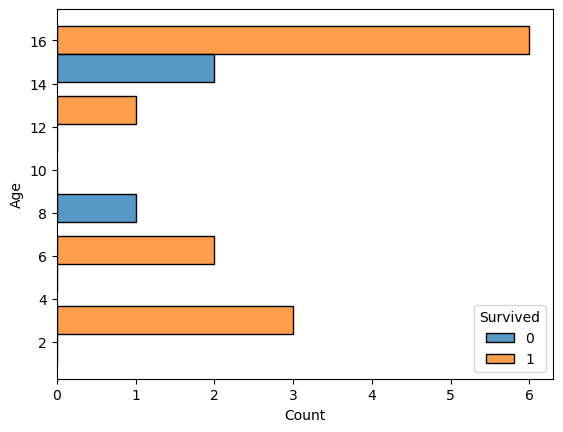

In [203]:
#Age
plot = sns.histplot(data=teste, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot